In [ ]:
import numpy as np                     # numeric python lib

import matplotlib.image as mpimg       # reading images to numpy arrays
import matplotlib.pyplot as plt        # to plot any graph
import matplotlib.patches as mpatches  # to draw a circle at the mean contour

from skimage import measure            # to find shape contour
import scipy.ndimage as ndi            # to determine shape centrality

import pandas as pd

import math

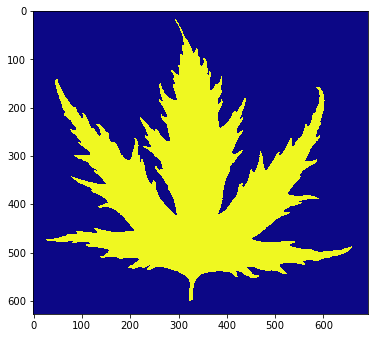

In [9]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)

img = mpimg.imread('images/110.jpg')
img = ((img > 250) * 255).astype(img.dtype)

plt.imshow(img, cmap='plasma')  # show the leaf
plt.show()

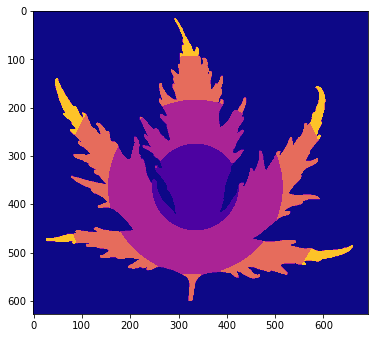

In [10]:
centered = np.ones_like(img)
width, height = centered.shape
dim = int(np.sqrt(width * width + height * height))		#for each point in the leaf, we want to set the image value at that point
cy, cx = ndi.center_of_mass(img)				#to be the distance from the center of the leaf
cy = int(round(cy, 0))					#to do so, we simply calculate the distance from the center
cx = int(round(cx, 0))					#for each point in the entire image
centered[cy, cx] = 0					#and then mask via the points in the leaf
centered_dist_2d = ndi.distance_transform_edt(centered)
scaled_img = np.multiply(img, dim)
leaf_center_distances = np.minimum(scaled_img, centered_dist_2d)
largest = np.max(leaf_center_distances)	
plt.imshow(leaf_center_distances, cmap='plasma', alpha=.2)
plt.contourf(leaf_center_distances, cmap='plasma', levels=[0,0.1,largest/4,largest/2,3*largest/4,largest])
plt.show()
    

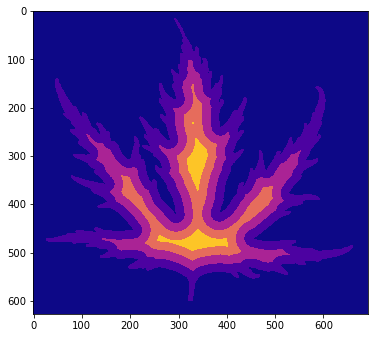

In [11]:
dist_2d = ndi.distance_transform_edt(img)
largest = np.max(dist_2d)
plt.imshow(dist_2d, cmap='plasma', alpha=.2)
plt.contourf(dist_2d, cmap='plasma', levels=[0,0.1,largest/4,largest/2,3*largest/4,largest])
plt.show()

C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


<function matplotlib.pyplot.show>

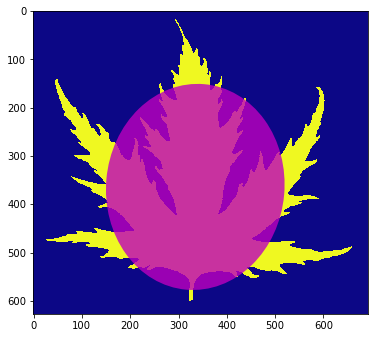

In [12]:
from matplotlib.patches import Ellipse

x_imgsize, y_imgsize = img.shape
    
x_rnd = [x % x_imgsize for x in range(x_imgsize*y_imgsize)]         
y_rnd = [y/x_imgsize for y in range(x_imgsize*y_imgsize)]           
rnd_coords = np.array([y_rnd, x_rnd])                               
shape_mask = (img > 0)[x_rnd, y_rnd]
sampled_coords = rnd_coords[0, shape_mask], rnd_coords[1, shape_mask]
    
covariance_matrix = np.cov(sampled_coords)                          
eigenvalues, eigenvectors = pd.np.linalg.eigh(covariance_matrix)    
order = eigenvalues.argsort()[::-1]                                 
eigenvectors = eigenvectors[:,order]                                
angleradian = pd.np.arctan2(*eigenvectors[0]) % (2 * pd.np.pi)      
total = np.count_nonzero(img)
scale_factor = np.sqrt(total/(math.pi*np.sqrt(eigenvalues[1]*eigenvalues[0])))
width, height = 2*scale_factor*np.sqrt(eigenvalues)                 
xcenter, ycenter = ndi.measurements.center_of_mass(img > 0)

ellipse = Ellipse(xy=[ycenter, xcenter],
                  width=width, height=height, angle=angleradian, 
                  fc='m', color='none', alpha=.8)

ax = plt.subplot(111)

ax.add_artist(ellipse)
plt.imshow(img, cmap='plasma')
plt.show